In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = sns.load_dataset("tips")

In [2]:
# 히트맵 - heatmap
# heatmap은 여러 가지 변수를 한 번에 비교할 때 유용하게 사용하는 시각화 방법
# 2차원 격자 모양으로 나뉜 각각의 칸에 데이터의 값을 색상으로 표시함.

# heatmap은 3차원 데이터(x축, y축, 값)를 2차원 평면에 효과적으로 표현할 수 있는 강력한 도구.
# heatmap의 입력으로 사용되는 데이터의 구조는 기존에 사용했던 1차원 형태가 아닌, 2차원 형태의 데이터를 입력받음.

# heatmap 데이터의 특징
# x축과 y축: 범주형 데이터 (실수형 데이터는 사용 X)
# 격자 안의 값은 숫자 형태의 변수만 가능.
# 표시할 값: mean, max, sum, min, count 등

In [3]:
# heatmap 기본 문법
# sns.heatmap(data)

# parameter 01. data
# 2차원 Dataset (rectangular dastaset)

# parameter 02. annot
# 값 표시 여부

In [5]:
# 기본 heatmap 생성을 위한 pivot table 생성하기.
# heatmap에서 사용하는 data는 Dataframe을 pivot해 생성할 수 있음.
# 인원수, 요일에 따른 평균 tip을 표시하도록 pivot table 생성하기.
pivot_df = df.pivot_table("tip", "day", "size", observed=True)
pivot_df

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


<Axes: xlabel='size', ylabel='day'>

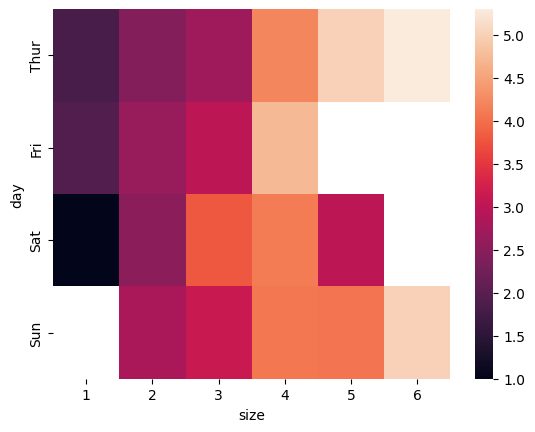

In [7]:
# pivot table을 heatmap으로 변환하기.
sns.heatmap(pivot_df)

# 결측치는 흰색(무색)으로 표시됨.
# 색의 농도에 따른 tip 지불 금액을 알 수 있음.
# 색이 연해질수록 tip 지불 금액이 커짐. 반대로 색이 진해질수록 tip 지불 금액이 낮아짐.
# 무슨 요일의 몇 명의 인원이 왔을 때 tip 지불 금액이 제일 높았는지 확인 가능. (목요일 6인)

<Axes: xlabel='size', ylabel='day'>

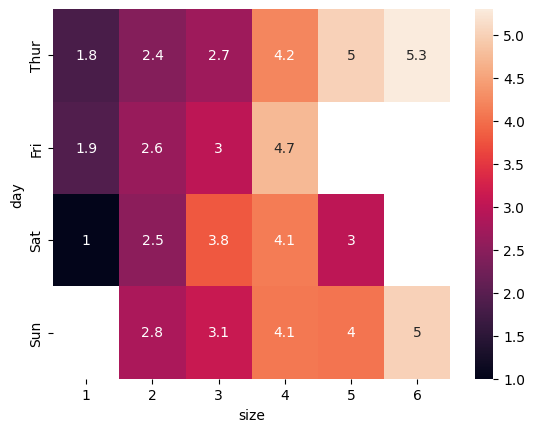

In [9]:
# heatmap에 값 표시하기.
# annot 속성을 True로 지정해 값을 함께 표시 가능.
sns.heatmap(pivot_df, annot=True)

# 색상으로도 잘 구분이 가능하지만, 각 칸의 값을 표시하는 것이 더 값 비교에는 쉽고 좋음.

/tmp/ipykernel_9096/3825371686.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_ordered = df.pivot_table('tip', 'day', 'size')


<Axes: xlabel='size', ylabel='day'>

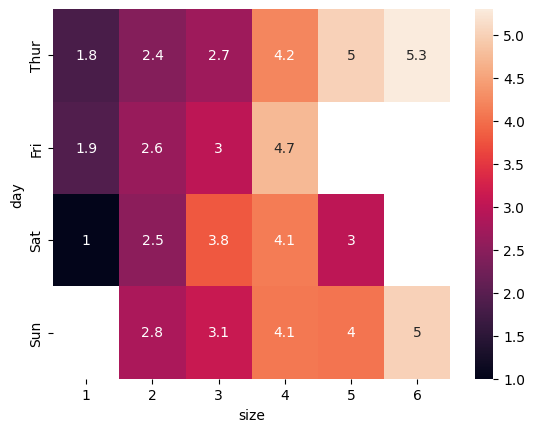

In [11]:
# heatmap은 3차원 형태의 데이터를 표시하기 때문에, 데이터가 지나치게 많으면 혼란 발생.
# x축과 y축에 표시할 데이터가 순차적으로 정렬되어 있어야 해석이 용이함.

# 카테고리 순서 지정하기.
day_order = ['Thur', 'Fri', 'Sat', 'Sun']
size_order = [1, 2, 3, 4, 5, 6]

# 순서가 지정된 pivot table
pivot_ordered = df.pivot_table('tip', 'day', 'size')
pivot_ordered = pivot_ordered.reindex(day_order)
pivot_ordered = pivot_ordered.reindex(columns=size_order)

sns.heatmap(pivot_ordered, annot=True)

# 위의 방법은 결과물은 처음과 동일함.
# 그렇다는 것은 기본 logic이 이렇게 정렬 및 동작해서 heatmap을 만들어 낸다는 의미겠지.
# 나중에 사용할 pivot table에 정렬이 필요할 경우, reindex를 사용해서 정렬을 하면 되겠지.

In [12]:
# heatmap 최적화 tip

# 01. 적절한 크기.
# 너무 많은 category는 피하기. 보통 20x20을 권장.

# 02. 정렬
# 크기순, 시간순 등 의미 있는 순서로 정렬하기.

# 03. 색상 선택
# 데이터 특성에 맞는 색상 팔레트 사용하기.

# 04. 결측치 처리
# 적절한 방법으로 결측치를 처리하기.